In [8]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import numpy as npipp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


### Loading/Cleaning Data

While exploring data, I realized that the dataset had the human freedom index scores of each country for multiple years. For analysis, I decided to filter for the most recent year listed in order to have the most up to date analysis. In this case, the most recent years recorded is 2018. 

In [9]:
hfi_2020 = pd.read_csv("hfi_cc_2020.csv")
hfi = hfi_2020[hfi_2020["year"]==2018]
hfi.head()

Unnamed: 0  year ISO_code  countries                         region  \
0            0  2018      ALB    Albania                 Eastern Europe   
11          11  2018      DZA    Algeria     Middle East & North Africa   
22          22  2018      AGO     Angola             Sub-Saharan Africa   
33          33  2018      ARG  Argentina  Latin America & the Caribbean   
44          44  2018      ARM    Armenia        Caucasus & Central Asia   

    hf_score  hf_rank  hf_quartile  pf_rol_procedural  pf_rol_civil  ...  \
0       7.81     43.0          2.0                6.0           4.8  ...   
11      5.20    154.0          4.0                5.2           5.6  ...   
22      5.48    144.0          4.0                2.7           4.4  ...   
33      7.05     70.0          2.0                6.8           5.9  ...   
44      7.69     47.0          2.0                NaN           NaN  ...   

    ef_regulation_business_bureaucracy  ef_regulation_business_start  \
0                                  6.7                           9.7   
11                                 2.4                           9.3   
22                                 2.4                           8.7   
33                                 6.7                           9.6   
44                                 6.0                           9.9   

    ef_regulation_business_bribes  ef_regulation_business_licensing  \
0                             5.4                               5.6   
11                            3.9                               8.8   
22                            5.0                               7.9   
33                            7.2                               5.7   
44                            6.3                               9.3   

    ef_regulation_business_compliance  ef_regulation_business  ef_regulation  \
0                                 7.2                     6.7            7.7   
11                                7.0                     5.9            5.6   
22                                6.8                     5.6            5.4   
33                                6.5                     6.4            5.8   
44                                7.0                     7.3            7.8   

    ef_score  ef_rank  womens_freedom  
0       7.80     26.0            9.26  
11      4.97    157.0            3.50  
22      4.75    159.0            8.50  
33      5.78    144.0           10.00  
44      7.92     18.0            9.26  

[5 rows x 113 columns]

Additionally, I found a dataset that housed basic information about the countries, with information such as demographics, climate, etc, that we thought could add to the analysis. I did a left join with the hfi dataset to merge the two.

In [10]:
countries_info = pd.read_csv("countries.csv")
countries_info.head()

countries                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [11]:
df_join = hfi.join(countries_info, lsuffix='_left')
df_join

Unnamed: 0  year ISO_code countries_left                         region  \
0              0  2018      ALB        Albania                 Eastern Europe   
11            11  2018      DZA        Algeria     Middle East & North Africa   
22            22  2018      AGO         Angola             Sub-Saharan Africa   
33            33  2018      ARG      Argentina  Latin America & the Caribbean   
44            44  2018      ARM        Armenia        Caucasus & Central Asia   
...          ...   ...      ...            ...                            ...   
1727        1727  2018      VEN  Venezuela, RB  Latin America & the Caribbean   
1738        1738  2018      VNM        Vietnam                     South Asia   
1749        1749  2018      YEM    Yemen, Rep.     Middle East & North Africa   
1760        1760  2018      ZMB         Zambia             Sub-Saharan Africa   
1771        1771  2018      ZWE       Zimbabwe             Sub-Saharan Africa   

      hf_score  hf_rank  hf_quartile  pf_rol_procedural  pf_rol_civil  ...  \
0         7.81     43.0          2.0                6.0           4.8  ...   
11        5.20    154.0          4.0                5.2           5.6  ...   
22        5.48    144.0          4.0                2.7           4.4  ...   
33        7.05     70.0          2.0                6.8           5.9  ...   
44        7.69     47.0          2.0                NaN           NaN  ...   
...        ...      ...          ...                ...           ...  ...   
1727      4.08    160.0          4.0                1.0           2.7  ...   
1738      6.25    121.0          3.0                4.6           4.6  ...   
1749      4.17    159.0          4.0                NaN           NaN  ...   
1760      6.71     96.0          3.0                3.3           4.7  ...   
1771      5.59    141.0          4.0                2.4           4.5  ...   

      Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0                   3,2       12,13       0,22      87,65        1       46,6   
11                565,5        6,55       0,04      93,41        1      12,14   
22                851,4          20          0         80        2       11,4   
33                  3,4       35,05      14,02      50,93        2      42,22   
44                 24,5       35,87      23,32      40,81        2      36,93   
...                 ...         ...        ...        ...      ...        ...   
1727                NaN         NaN        NaN        NaN      NaN        NaN   
1738                NaN         NaN        NaN        NaN      NaN        NaN   
1749                NaN         NaN        NaN        NaN      NaN        NaN   
1760                NaN         NaN        NaN        NaN      NaN        NaN   
1771                NaN         NaN        NaN        NaN      NaN        NaN   

      Deathrate  Agriculture  Industry  Service  
0         20,34         0,38      0,24     0,38  
11         7,51        0,038     0,262      0,7  
22         7,74         0,01       0,1     0,89  
33        13,46        0,463     0,203    0,334  
44          8,2          0,4      0,04     0,56  
...         ...          ...       ...      ...  
1727        NaN          NaN       NaN      NaN  
1738        NaN          NaN       NaN      NaN  
1749        NaN          NaN       NaN      NaN  
1760        NaN          NaN       NaN      NaN  
1771        NaN          NaN       NaN      NaN  

[162 rows x 133 columns]

### Exploratory Data Analysis

I am going to explore the basics of the data. 

In [12]:
print(len(hfi))

162


I see above that there is data for 162 countries. This offers a slight limitation/potential bias to our analysis since I am working with incomplete data, for there are approximately 192 countries in the world. Despite this, I feel that the data I have is sufficient for the research questions outlined. 

Let's now explore some basic stats of the data. 

One concern I had about our data was whether the variable womens_freedom was an accurate average of every other women related index scores available. I will test with one country's scores to see if the average of all the women freedom columns equate to its corresponding womens_freedom score. 

In [13]:
albania = hfi[hfi["countries"]=="Albania"]
women = albania.filter(regex='women',axis=1)
female = albania.filter(regex='female',axis=1)
women["temp1"] = 1
female["temp1"] = 1
women = women.merge(female, on ="temp1")
print("Womens Freedom Score: " , women["womens_freedom"])
print("AVG of all women related scores: ",women[['pf_ss_women_fgm', 'pf_ss_women_inheritance', 'pf_ss_women', 'pf_movement_women', 'pf_identity_sex_female']].mean(axis=1))

Womens Freedom Score:  0    9.26
Name: womens_freedom, dtype: float64
AVG of all women related scores:  0    9.26
dtype: float64


As you can see above, womens_freedom is indeed an average of all the women related scores. Thus, we will use womens_freedom as our target variable, and remove the corresponding variables that are directly correlated to it in our modelling. 

In [14]:
avg_hf = hfi["hf_score"].mean()
print("International Avg Score for Human Freedom: ", avg_hf)
avg_womensfreedom = hfi["womens_freedom"].mean()
print("International Avg Score for Womens Freedom: ", avg_womensfreedom)

International Avg Score for Human Freedom:  6.933024691358026
International Avg Score for Womens Freedom:  8.030493827160495


### Basic Relationship Graphs

In order to visually see some basic patterns and relationships, I plotted some bivariate graphs below between variables I saw with potential effect on womens_freedom, and womens_freedom. 

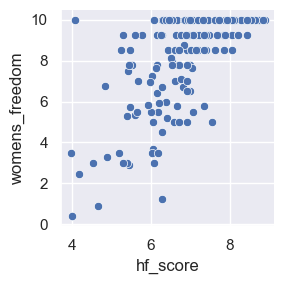

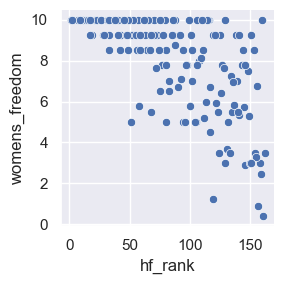

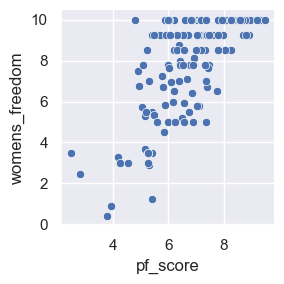

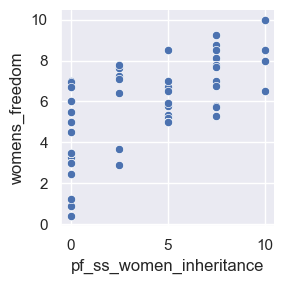

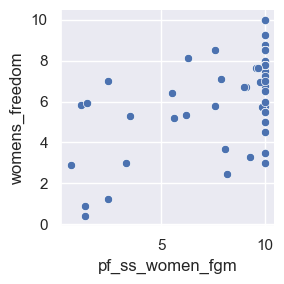

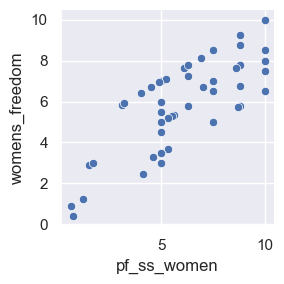

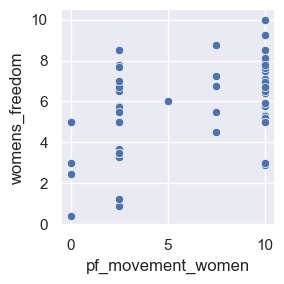

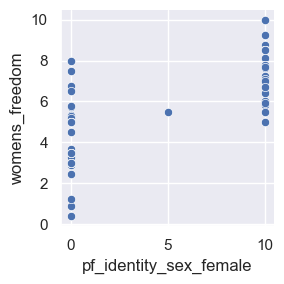

In [15]:
sns.relplot(data=hfi, x="hf_score", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="hf_rank", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_score", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_ss_women_inheritance", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_ss_women_fgm", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_ss_women", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_movement_women", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_identity_sex_female", y="womens_freedom", height=3)

<Axes: xlabel='hf_quartile', ylabel='womens_freedom'>

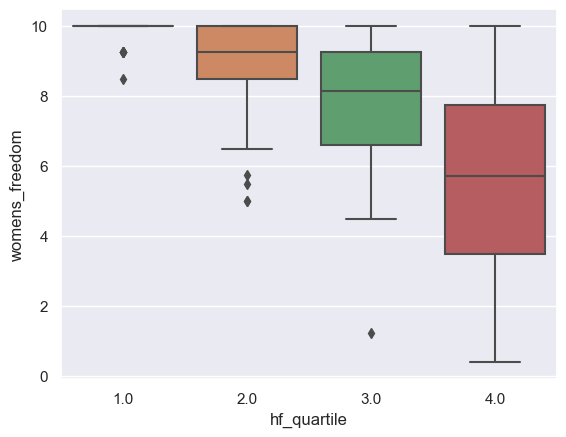

In [16]:
sns.boxplot(data=hfi, x="hf_quartile", y="womens_freedom")

### Linear Regression Modeling

#### Political Freedom Model

In [17]:
#removing women related variables
pf = hfi.drop(['pf_ss_women_fgm', 'pf_ss_women_inheritance', 'pf_ss_women', 'pf_movement_women', 'pf_identity_sex_female'],
                axis = 1)
target = pf["womens_freedom"].values
data = pf.filter(regex='^pf',axis=1)
# filling na with row average
data = data.apply(lambda row: row.fillna(row.mean()), axis=1)

In [18]:
model_pf = LinearRegression()
model_pf.fit(X=data, y=target)
hfi["predicted_from_pf"] = model_pf.predict(data)
pf_predictions = model_pf.predict(data)
#Accuracy
print("MSE: ", mean_squared_error(hfi["womens_freedom"].values, hfi["predicted_from_pf"].values), 
     "\nr^2: ", r2_score(hfi["womens_freedom"].values, hfi["predicted_from_pf"].values))

MSE:  0.003184069828379139 
r^2:  0.9994104993293952


In [19]:
# other model with output
model2 = sm.OLS(target, data)
results = model2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.271e+04
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                   1.16e-242
Time:                        12:39:20   Log-Likelihood:                          235.85
No. Observations:                 162   AIC:                                     -387.7
Df Residuals:                     120   BIC:                                     -258.0
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

#### Economic Freedom Model

In [20]:
#the are no specific women-related columns that fall under economic freedoms
ef_data = hfi.filter(regex='^ef',axis=1)
# filling na with row average
ef_data = ef_data.apply(lambda row: row.fillna(row.mean()), axis=1)

In [21]:
model_ef = LinearRegression()
model_ef.fit(X=ef_data, y=target)
hfi["predicted_from_ef"] = model_ef.predict(ef_data)
#Accuracy
print("MSE: ", mean_squared_error(hfi["womens_freedom"].values, hfi["predicted_from_ef"].values), 
     "\nr^2: ", r2_score(hfi["womens_freedom"].values, hfi["predicted_from_ef"].values))

MSE:  1.5581104609994894 
r^2:  0.7115304590844445


In [22]:
# other model with output
model4 = sm.OLS(target, ef_data)
results_ef = model4.fit()
print(results_ef.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              80.22
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                    3.15e-66
Time:                        12:39:23   Log-Likelihood:                         -266.34
No. Observations:                 162   AIC:                                      646.7
Df Residuals:                     105   BIC:                                      822.7
Df Model:                          57                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

#### Countries Model

In [23]:
#removing women related variables

merged = df_join.drop(['pf_ss_women_fgm', 'pf_ss_women_inheritance', 'pf_ss_women', 'pf_movement_women', 'pf_identity_sex_female'],
                axis = 1)
data = merged[["womens_freedom", "Population","Area (sq. mi.)","Pop. Density (per sq. mi.)","Coastline (coast/area ratio)","Net migration","Infant mortality (per 1000 births)","GDP ($ per capita)","Literacy (%)","Phones (per 1000)","Arable (%)","Crops (%)","Other (%)","Climate","Birthrate","Deathrate","Agriculture","Industry","Service"]]

#converting variables to string type

data['Climate'] = data['Climate'].astype('str')
data['Population'] = data['Population'].astype('str')
data['Area (sq. mi.)'] = data['Area (sq. mi.)'].astype('str')
data['GDP ($ per capita)'] = data['GDP ($ per capita)'].astype('str')
data['Pop. Density (per sq. mi.)'] = data['Pop. Density (per sq. mi.)'].astype('str')
data['Coastline (coast/area ratio)'] = data['Coastline (coast/area ratio)'].astype('str')
data['Net migration'] = data['Net migration'].astype('str')
data['Infant mortality (per 1000 births)'] = data['Infant mortality (per 1000 births)'].astype('str')
data['Literacy (%)'] = data['Literacy (%)'].astype('str')
data['Phones (per 1000)'] = data['Phones (per 1000)'].astype('str')
data['Arable (%)'] = data['Arable (%)'].astype('str')
data['Crops (%)'] = data['Crops (%)'].astype('str')
data['Other (%)'] = data['Other (%)'].astype('str')
data['Birthrate'] = data['Birthrate'].astype('str')
data['Deathrate'] = data['Deathrate'].astype('str')
data['Agriculture'] = data['Agriculture'].astype('str')
data['Industry'] = data['Industry'].astype('str')
data['Service'] = data['Service'].astype('str')
data['womens_freedom']=data['Service'].astype('str')

#replacing comma with dot

data.apply(lambda x: x.str.replace(',','.'))
data = data.stack().str.replace(',','.').unstack()

#converting variables to float type

data['Climate'] = data['Climate'].astype(float)
data['Population'] = data['Population'].astype(float)
data['Area (sq. mi.)'] = data['Area (sq. mi.)'].astype(float)
data['GDP ($ per capita)'] = data['GDP ($ per capita)'].astype(float)
data['Pop. Density (per sq. mi.)'] = data['Pop. Density (per sq. mi.)'].astype(float)
data['Coastline (coast/area ratio)'] = data['Coastline (coast/area ratio)'].astype(float)
data['Net migration'] = data['Net migration'].astype(float)
data['Infant mortality (per 1000 births)'] = data['Infant mortality (per 1000 births)'].astype(float)
data['Literacy (%)'] = data['Literacy (%)'].astype(float)
data['Phones (per 1000)'] = data['Phones (per 1000)'].astype(float)
data['Arable (%)'] = data['Arable (%)'].astype(float)
data['Crops (%)'] = data['Crops (%)'].astype(float)
data['Other (%)'] = data['Other (%)'].astype(float)
data['Birthrate'] = data['Birthrate'].astype(float)
data['Deathrate'] = data['Deathrate'].astype(float)
data['Agriculture'] = data['Agriculture'].astype(float)
data['Industry'] = data['Industry'].astype(float)
data['Service'] = data['Service'].astype(float)
data['womens_freedom'] = data['Service'].astype(float)
data 

# filling na with row average
data = data.apply(lambda row: row.fillna(row.mean()), axis=1)
data =data.dropna()
target = data["womens_freedom"].values
data2 = data.drop(["womens_freedom"], axis=1)
print(len(data))
print(len(target))

21
21


In [24]:
model_merged = LinearRegression()
model_merged.fit(X=data2, y=target)
data["predicted_from_merged"] = model_merged.predict(data2)
#Accuracy
print("MSE: ", mean_squared_error(data["womens_freedom"].values, data["predicted_from_merged"].values), 
     "\nr^2: ", r2_score(data["womens_freedom"].values, data["predicted_from_merged"].values))

MSE:  8.851618045659608e-28 
r^2:  1.0


In [25]:
# other model with output
model5 = sm.OLS(target, data)
results_hf = model5.fit()
print(results_hf.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.460e+23
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           4.84e-36
Time:                        12:39:26   Log-Likelihood:                 597.42
No. Observations:                  21   AIC:                            -1159.
Df Residuals:                       3   BIC:                            -1140.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
wome

### Results/Conclusion

I want to find variables that are statistically significant in their effects on women's freedom. At the 5% significance level, these include variables with p-values lower than 0.05, meaning that I can reject the null hypothesis that the independent variable in question has no effect on women's freedom score. These variables include pf_ss_homicide, pf_ss_disappearances_disap, pf_ss_disappearances_violent, pf_disappearances_organized, pf_ss_disappearances_fatalities, pf_ss_disappearances_injuries, pf_ss_disappearances, pf_ss, pf_movement_domestic, pf_movement_foreign, pf_movement, pf_identity_sex_male, pf_identity_sex. 

Taking out variables that are almost perfectly correlated with each other and will generate the same effects on women's freedom, I am left with pf_ss_homicide, pf_ss_disappearances, pf_ss, pf_movement, and pf_identity_sex. 

Looking into the data set, Iwanted to see what these variables mean to get a better picture of what affects women's freedom.

pf_ss_homicide measures the homicide rate.pf_ss_disappearances measures disappearances, including those politically motivated and trafficking disappearances. pf_ss takes into account all variables measuring the safety and security of a country. These variables are correlated with women's freedom because violence reduces personal freedom and the right to life and security are fundamental to liberty. Violence is often used against women to reduce their liberty, which may explain why these variables have statistically significant effects on women's freedom. 

pf_movement measures the freedom to travel because it is essential to a free society. We believe that governments that do not allow their citizens to move freely are limiting their citizen's, more specifically women's, ability to engage in their choosing and interact with the world, which is why the relationship between these two variables is statistically significant. 

pf_identity_sex is the freedoms to establish one's own identity and to have intimate and familial relationships with others. The more freedom a government gives to their citizens to choose their relationships, the more likely they are to give their women more rights, meaning this may not necessarily be a causal relationship but instead identity is an indicator for a more liberal government. 

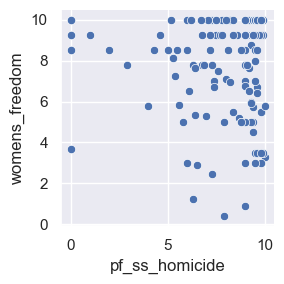

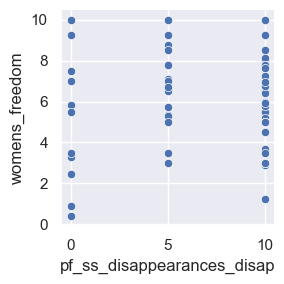

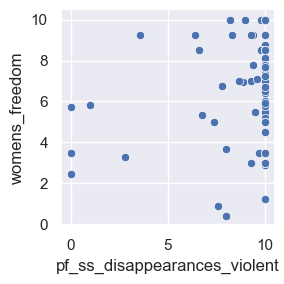

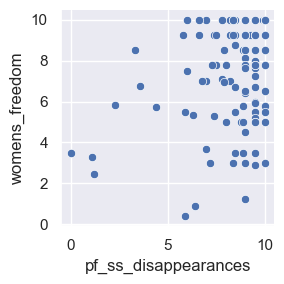

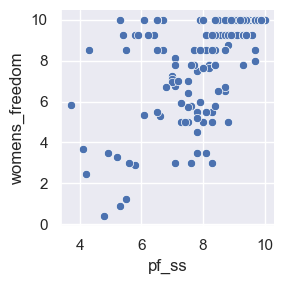

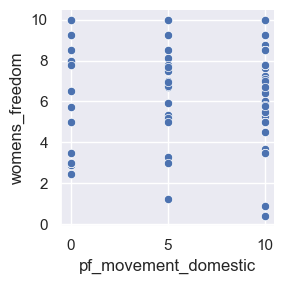

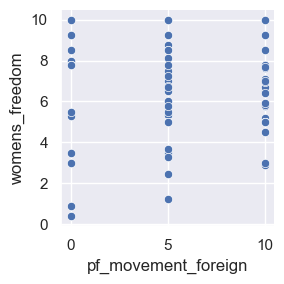

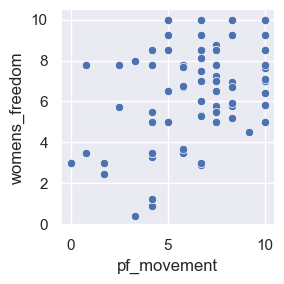

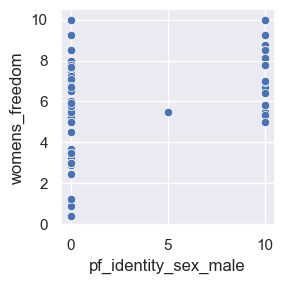

In [ ]:
sns.relplot(data=hfi, x="pf_ss_homicide", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_ss_disappearances_disap", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_ss_disappearances_violent", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_ss_disappearances", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_ss", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_movement_domestic", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_movement_foreign", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_movement", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_identity_sex_male", y="womens_freedom", height=3)
sns.relplot(data=hfi, x="pf_identity_sex", y="womens_freedom", height=3)